In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = 20       # 파장(wave length)
amp = 15     # 진폭(amplitude)

img = cv2.imread('./img/taekwonv1.jpg')
rows, cols = img.shape[:2]

In [3]:
# 초기 매핑 배열 생성
mapy, mapx = np.indices((rows, cols), dtype=np.float32)

# sin, cos 함수를 이용한 매핑 연산
sinx = mapx + amp * np.sin(mapy/l)
cosy = mapy + amp * np.cos(mapx/l)

In [4]:
# 영상 리매핑
img_sinx = cv2.remap(img, sinx, mapy, cv2.INTER_LINEAR)   # x축만 sin 곡선 적용
img_cosy = cv2.remap(img, mapx, cosy, cv2.INTER_LINEAR)   # y축만 cos 곡선 적용

# x, y 축 모두 sin, cos 곡선 적용 및 외곽 영역 보정
img_both = cv2.remap(img, sinx, cosy, cv2.INTER_LINEAR, None, cv2.BORDER_REPLICATE)

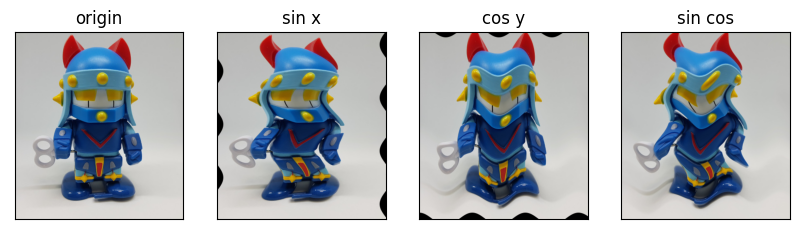

In [8]:
# 결과 출력
imgs = {'origin':img, 'sin x':img_sinx, 'cos y':img_cosy, 'sin cos':img_both}

fig = plt.figure(figsize=(10, 5))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, 4, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()